# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Библиотеки-и-функции" data-toc-modified-id="Библиотеки-и-функции-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Библиотеки и функции</a></span><ul class="toc-item"><li><span><a href="#Оценка-AUC-ROC-модели,-семплирование" data-toc-modified-id="Оценка-AUC-ROC-модели,-семплирование-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Оценка AUC ROC модели, семплирование</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тестирование моделей</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающие-деревья" data-toc-modified-id="Решающие-деревья-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Решающие деревья</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Upsampling-и-Downsampling" data-toc-modified-id="Upsampling-и-Downsampling-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Upsampling и Downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

## Описание данных

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
- `Exited` — факт ухода клиента

## Библиотеки и функции

In [1]:
# для вывода
from IPython.display import Markdown, display 
from tqdm.notebook import tqdm_notebook as tqdm
import time

# для работы с данными
import pandas as pd
import numpy as np

# для графики
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 5

# для обучения
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score, precision_score, recall_score, 
    auc, roc_auc_score, roc_curve
)
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# константы
RANDOM_STATE = 123

np.random.seed(RANDOM_STATE)

### Оценка AUC ROC модели, семплирование

In [2]:
def roc_curve_plot(model, X_test, y_test, title='ROC Curve'):
    ''' Функция построения ROC кривой
    '''
    pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    #plt.figure(figsize=(6,4))
    plt.title(title)
    plt.plot(fpr, tpr, 'g', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.grid()
    plt.xlim([0, 1]), plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    # print('ROC AUC score:', round(roc_auc, 4))


def upsample(features, target, repeat):
    ''' Функция возвращает увеличенные выборки признаков и меток

        features : pd.DataFrame
        target : pd.Series
        repeat : int - множитель, кратно которому необходимо увеличить выборку
    '''
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        
    return shuffle(features_upsampled, target_upsampled, random_state=RANDOM_STATE)


def downsample(features, target, fraction):
    ''' Функция возвращает уменьшенные выборки признаков и меток

        features : pd.DataFrame
        target : pd.Series
        fraction : float - доля, кратно которой необходимо уменьшить выборку
    '''
    features_zeros = features[target == 0].sample(frac=fraction, random_state=RANDOM_STATE)
    features_ones = features[target == 1]
    target_zeros = target[target == 0].sample(frac=fraction, random_state=RANDOM_STATE)
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros] + [features_ones]) 
    target_downsampled = pd.concat([target_zeros] + [target_ones])
     
    return shuffle(features_downsampled, target_downsampled, random_state=RANDOM_STATE)

### Тестирование моделей

In [3]:
def f1_test_decision_tree(X_train, y_train, X_test, y_test, max_depth=10, class_weight=None):
    ''' Функция определяет f1 меру для решающих деревьев с глубиной влоть до max_depth, выводит график
    
        X_train, y_train : array-like - тренировочные признаки и метки
        X_test, y_test : array-like - тестовые признаки и метки
        max_depth : int - значение глубины, до которого тестируем модели
        n_estimators : int - количество деревьев
        class_weight : str - флаг, балансировать ли классы
        
        Возвращает:
        DecisionTreeClassifier с наилучшим f1_score
    '''
    stat = {}
    # обучение, вычисление f1
    for dep in range(1, max_depth+1):
        model = DecisionTreeClassifier(
            max_depth=dep, class_weight=class_weight, random_state=RANDOM_STATE)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        stat[dep] = f1_score(y_test, y_pred)

    # график
    pd.Series(stat).plot(grid=True,
        xlabel = 'Глубина дерева', ylabel = 'F1-мера', 
        title  = 'Зависимость f1 меры от глубины для решающего дерева')
    
    max_f1_depth = max(stat, key=stat.get)
    print("Максимальная F1-мера = {:.4f}, глубина {:2d}".format(max(stat.values()), max_f1_depth))
    return DecisionTreeClassifier(max_depth=max_f1_depth, class_weight=class_weight, 
                                  random_state=RANDOM_STATE)


def f1_test_random_forest_depth(X_train, y_train, X_test, y_test, 
        depths=range(1,11), n_estimators=10, class_weight=None):
    ''' Функция определяет f1 меру для случайного леса деревьев с глубиной влоть до max_depth,
        количеством деревьем n_est, выводит график
        
        Параметры:
        X_train, y_train : array-like - тренировочные признаки и метки
        X_test, y_test : array-like - тестовые признаки и метки
        depths : list/range - значения глубин, которые перебираем
        n_estimators : int - количество деревьев
        class_weight : str - флаг, балансировать ли классы
        
        Возвращает:
        tuple : (RandomForestClassifier с наилучшим f1_score, значение f1_score)
    '''
    stat = {}
    # обучение, вычисление f1
    for dep in depths:
        model = RandomForestClassifier(max_depth=dep, n_estimators=n_estimators, 
                                       class_weight=class_weight, random_state=RANDOM_STATE)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        stat[dep] = f1_score(y_test, y_pred)

    # график
    pd.Series(stat).plot(grid=True,
        xlabel = 'Глубина дерева', ylabel = 'F1-мера', 
        title  = 'Зависимость f1 меры от глубины деревьев')
    
    max_f1_depth = max(stat, key=stat.get)
    print("Максимальная F1-мера: n_estimators = {:3d}, max_depth = {:2d} : {:.4f}"
              .format(n_estimators, max_f1_depth, max(stat.values()) ))
    return (RandomForestClassifier(max_depth=max_f1_depth, n_estimators=n_estimators,
                                  class_weight=class_weight, random_state=RANDOM_STATE), 
            max(stat.values()) )

    
def f1_test_random_forest_n_estimators(X_train, y_train, X_test, y_test, 
        max_depth=10, n_estimators=range(10,101,10), class_weight=None):
    ''' Функция определяет f1 меру для случайного леса деревьев с глубиной max_depth,
        количеством деревьем из n_estimators, выводит график
        
        Параметры:
        X_train, y_train : array-like - тренировочные признаки и метки
        X_test, y_test : array-like - тестовые признаки и метки
        max_depth : int - значение глубины
        n_estimators : list/range - значения количества деревьев, которые перебираем
        class_weight : str - флаг, балансировать ли классы
        
        Возвращает:
        tuple : (RandomForestClassifier с наилучшим f1_score, значение f1_score)
    '''
    stat = {}
    # обучение, вычисление f1
    for n_est in tqdm(n_estimators, leave=False, desc='max_depth = '+str(max_depth)):
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_est,
                                       class_weight=class_weight, random_state=RANDOM_STATE)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        stat[n_est] = f1_score(y_test, y_pred)

    # график
    pd.Series(stat).plot(grid=True,
        xlabel = 'Количество деревьев', ylabel = 'F1-мера', 
        title  = 'Зависимость f1 меры от количества деревьев')
    
    max_f1_estimators = max(stat, key=stat.get)
    print("Максимальная F1-мера: n_estimators = {:3d}, max_depth = {:2d} : {:.4f}"
              .format(max_f1_estimators, max_depth, max(stat.values()) ))
    return (RandomForestClassifier(max_depth=max_depth, n_estimators=max_f1_estimators,
                                   class_weight=class_weight, random_state=RANDOM_STATE),
            max(stat.values()) )


## Подготовка данных

Загрузим данные и посмотрим информацию о датасете

In [4]:
df = pd.read_csv('../datasets/Churn.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Столбец `RowNumber` удалим, он не несёт информации.

В столбце `Tenure` около 10% пропусков. Посмотрим на распределения значений `Tenure`, чтобы определить, чем заполнить пропуски

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

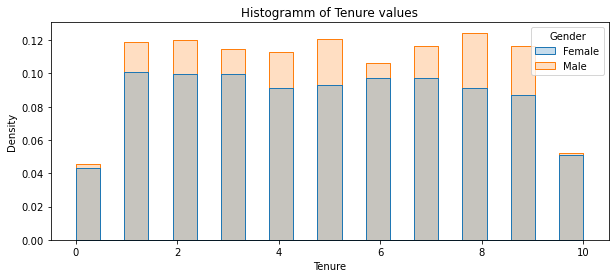

In [5]:
df.drop(columns=['RowNumber'], inplace=True)

plt.figure(figsize=(10,4))
sns.histplot(df, x='Tenure', hue='Gender', stat="density", element="step");
plt.title('Histogramm of Tenure values');

df['Tenure'].describe()

Средние и медианные значения совпадают. По гистограмме видим, что значения распределены равномерно. Поэтому заполним пропуски числами, выбранными случайно из заполненных значений столбца Tenure.

In [6]:
df.loc[df['Tenure'].isna(), 'Tenure'] = pd.Series(
    index = df[df['Tenure'].isna()].index,
    data = df['Tenure'].dropna().sample(df['Tenure'].isna().sum()).values
)
df['Tenure'].describe()

count    10000.000000
mean         4.975900
std          2.893572
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

Судя по значениям статистик распределение практически не поменялось

Отделим метки от признаков, при этом оставим только "обезличенные" признаки
Преобразуем категориальные признаки в численные. 

Признаки запишем в переменную `X`, метки - `y`

In [7]:
X = df.drop(['CustomerId','Surname','Exited'], axis=1)
y = df['Exited']

X['Gender'] = (X['Gender'] == 'Male').astype('int')
X = pd.get_dummies(X, drop_first=True)
X.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
7880,744,0,38,9.0,0.00,2,0,0,20940.76,0,0
7979,555,0,26,7.0,0.00,2,1,0,93122.41,0,0
9264,414,1,60,3.0,0.00,2,1,1,93844.82,0,1
4380,438,1,59,7.0,127197.14,1,1,0,51565.98,1,0
4799,551,1,52,1.0,0.00,1,0,0,63584.55,0,0


Разделим данные на обучающую и валидационную и тестовую выборки

Произведём масштабирование до единичной дисперсии (стандартизируем)

In [8]:
def print_shape(X, y ,str_to_print):
    print(str_to_print+'Признаки - {}, Метки - {}'.format(X.shape, y.shape))

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE) )

X_train, X_val, y_train, y_val = train_test_split( # 0.25 x 0.8 = 0.2
    X_train, y_train, test_size=0.25, random_state=RANDOM_STATE)

print_shape(X, y, 'Размер выборок до разделения: ')
print_shape(X_train, y_train, 'Тренировочная: ')
print_shape(X_val, y_val, 'Валидационная: ')
print_shape(X_test, y_test, 'Тестовая: ')

std_scaler = StandardScaler()
std_scaler.fit(X_train) 

X_train = pd.DataFrame(std_scaler.transform(X_train), 
                       columns=X_train.columns, index=X_train.index)
X_val   = pd.DataFrame(std_scaler.transform(X_val), 
                       columns=X_val.columns, index=X_val.index)
X_test  = pd.DataFrame(std_scaler.transform(X_test), 
                       columns=X_test.columns, index=X_test.index)

#pd.DataFrame(X_train, columns=X.columns).sample(5)
X_train.sample(5)

Размер выборок до разделения: Признаки - (10000, 11), Метки - (10000,)
Тренировочная: Признаки - (6000, 11), Метки - (6000,)
Валидационная: Признаки - (2000, 11), Метки - (2000,)
Тестовая: Признаки - (2000, 11), Метки - (2000,)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
790,0.477130,0.900582,-0.280962,1.750253,0.100709,0.781092,0.641171,0.973680,-0.108275,-0.579403,-0.584535
8967,1.890150,0.900582,-1.320629,0.709743,-1.213083,0.781092,0.641171,0.973680,-0.278540,-0.579403,-0.584535
8693,-0.317049,-1.110393,1.042251,0.016070,-1.213083,0.781092,0.641171,-1.027032,1.603259,-0.579403,-0.584535
395,-0.069513,-1.110393,-0.186447,-1.024440,0.973369,0.781092,-1.559646,0.973680,0.936830,1.725914,-0.584535
533,-1.121542,0.900582,-0.375477,1.750253,-0.264432,-0.920634,0.641171,-1.027032,-0.394535,-0.579403,1.710761


## Исследование задачи

### Логистическая регрессия

Обучим модель логистической регресии без учёта дисбаланса, посмотрим на метрику F1

Также постмотрим, как меняется точность, полнота, f1-мера и AUC ROC с изменением порога классификации

F1: 0.27472527472527475


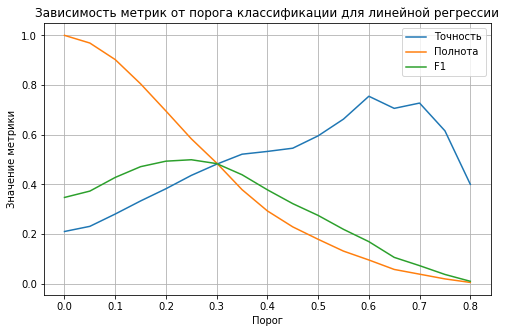

In [9]:
# обучим логистическую регрессию
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("F1:", f1_score(y_val, y_pred))

# сохраним вероятности пресдсказания положительного класса
prob_exited_val = model.predict_proba(X_val)[:, 1]

# таблица с метриками
stat = pd.DataFrame(columns=['Порог','Точность','Полнота','F1'])

# цикл по значениям порога
for threshold in np.arange(0, 0.81, 0.05):
    y_pred = list(map(float, prob_exited_val > threshold))

    stat = stat.append({
        'Порог'    : threshold, 
        'Точность' : precision_score(y_val, y_pred), 
        'Полнота'  : recall_score(y_val, y_pred), 
        'F1'       : f1_score(y_val, y_pred)}, 
    ignore_index=True)

# график
stat.plot(x='Порог', y=['Точность','Полнота','F1'], grid=True, figsize=(8,5),
    ylabel = 'Значение метрики', 
    title  = 'Зависимость метрик от порога классификации для линейной регрессии');

- Для нулевого порога полнота равна единице поскольку все ответы положительные, далее она падает с увеличением порога
- Точность растёт вплоть до порога 0.6.
- f1-мера максимальна при пороге примерно равном 0.25

Построим ROC кривую

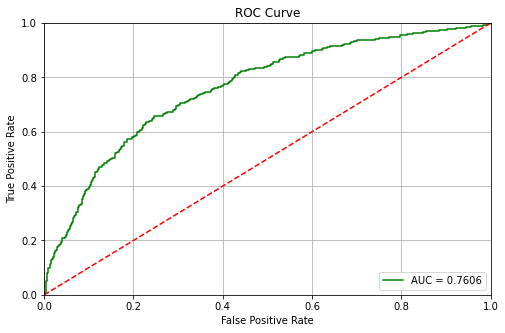

In [10]:
roc_curve_plot(model, X_val, y_val)

Логистическая регрессия с несбалансированными классами даёт очень плохие результаты, но смещение порога классификации позволяет достичь значения f1 примерно 0.5 

### Решающее дерево

Обучим деревья с разной глубиной

Максимальная F1-мера = 0.5677, глубина  5


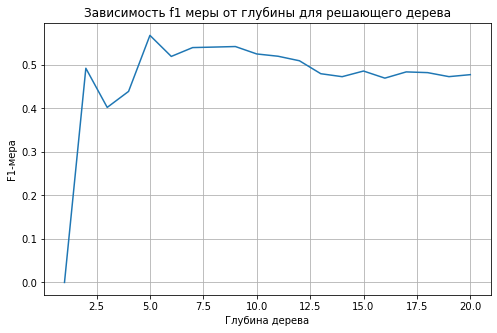

In [11]:
dt_model = f1_test_decision_tree(X_train, y_train, X_val, y_val, max_depth=20)

Решающее дерево даёт значительно лучший результат.

F1: 0.5677233429394812


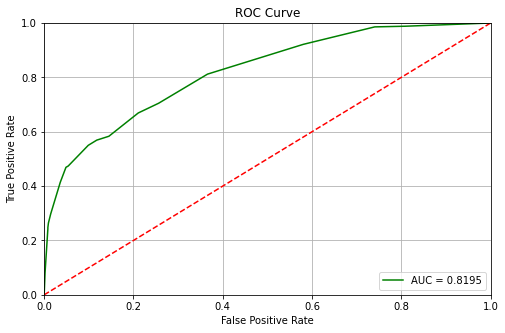

In [12]:
dt_model.fit(X_train, y_train)
print("F1:", f1_score(y_val, dt_model.predict(X_val)))
roc_curve_plot(dt_model, X_val, y_val)

Площадь под ROC кривой также немного больше

### Случайный лес

Обучим модель случайного леса, посмотрим, как меняется f1-мера с ростом глубины деревьем,
проделаем это с небольшими значениями количества деревьев 

Общий прогресс:   0%|          | 0/5 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators =  10, max_depth = 14 : 0.5656
Максимальная F1-мера: n_estimators =  20, max_depth = 15 : 0.5727
Максимальная F1-мера: n_estimators =  30, max_depth = 14 : 0.5791
Максимальная F1-мера: n_estimators =  40, max_depth = 14 : 0.5783
Максимальная F1-мера: n_estimators =  50, max_depth = 15 : 0.5701


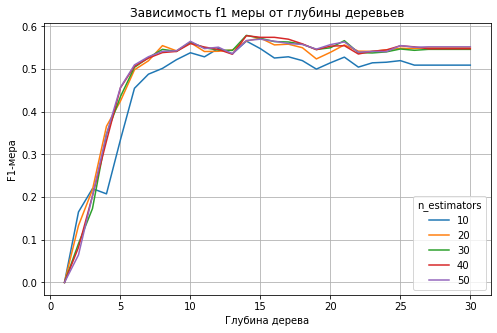

In [13]:
n_est_list = [10, 20, 30, 40, 50]
prev_score = 0
for n_est in tqdm(n_est_list, desc='Общий прогресс'):
    model, score = f1_test_random_forest_depth(X_train, y_train, X_val, y_val, 
                            depths=range(1,31), n_estimators=n_est)
    if score > prev_score: 
        rf_model1 = model
        
plt.legend(n_est_list, title='n_estimators');

Максимальное значение f1-меры получили для глубин меннее 20. Очевидно, что максимальное значение меры сохранится не для любого количества деревьев при той же глубине. Заметим, что нет смысла рассматривать глубину больше 26 - мера дальше уже не меняется, модель достигает предел количества ветвлений дерева. Аналогично обучим модели случайного леса и поссчитаем f1-меру в зависимости от количества деревьев для некоторых значений глубины

Общий прогресс:   0%|          | 0/4 [00:00<?, ?it/s]

max_depth = 14:   0%|          | 0/15 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators =  80, max_depth = 14 : 0.5845


max_depth = 16:   0%|          | 0/15 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators =  40, max_depth = 16 : 0.5745


max_depth = 18:   0%|          | 0/15 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators = 160, max_depth = 18 : 0.5653


max_depth = 20:   0%|          | 0/15 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators =  60, max_depth = 20 : 0.5670


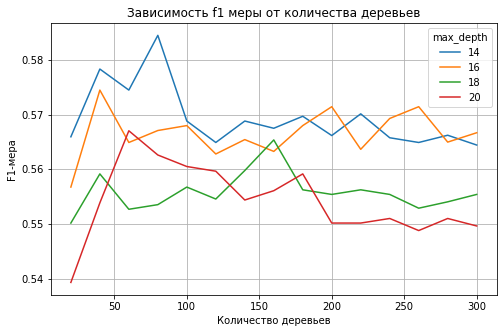

In [14]:
depth_list = [14, 16, 18, 20]
prev_score > 0
for dep in tqdm(depth_list, desc='Общий прогресс'):
    model, score = f1_test_random_forest_n_estimators(X_train, y_train, X_val, y_val, 
                                        max_depth=dep, n_estimators=range(20,301,20))
    if score > prev_score: 
        rf_model2 = model

plt.legend(depth_list, title='max_depth');

Для разных моделей f1 мера ведёт себя по-разному. Но особого увеличения метрики изменение гиперпараметров не дало.

Выведем ROC кривые для двух моделей леса с наивысшими f1 мерами.

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=123)
F1: 0.5701357466063348


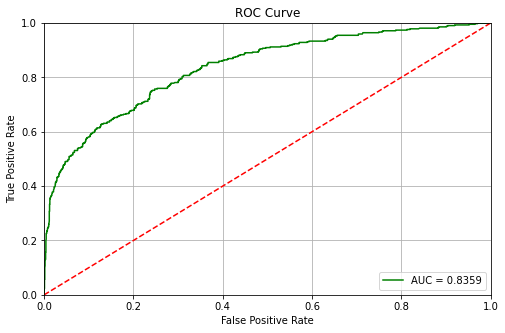

RandomForestClassifier(max_depth=20, n_estimators=60, random_state=123)
F1: 0.5670261941448382


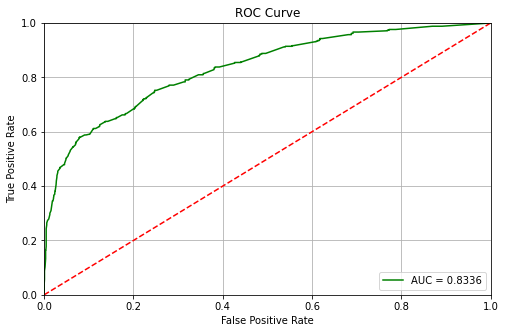

In [15]:
for model in [rf_model1, rf_model2]:
    print(model)
    model.fit(X_train, y_train)
    print("F1:", f1_score(y_val, model.predict(X_val)))
    roc_curve_plot(model, X_val, y_val)

Значения AUC ROC отличаются не сильно. При этом данная метрика выше у модели с меньшей f1 мерой.

## Борьба с дисбалансом

Посмотрим на баланс классов

Доли значений:


0    0.7963
1    0.2037
Name: Exited, dtype: float64

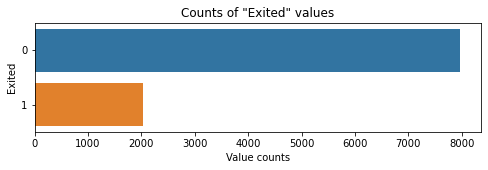

In [16]:
plt.figure(figsize=(8,2))
sns.countplot(data = df, y='Exited')
plt.title('Counts of "Exited" values')
plt.xlabel('Value counts')
plt.ylabel('Exited')

print('Доли значений:')
df['Exited'].value_counts() / len(df)

Объектов, принадлежащих к положительному классу в 4 раза меньше.

### Взвешивание классов

Обучим модели со сбалансированными классами

#### Логистическая регрессия

F1: 0.49744463373083475


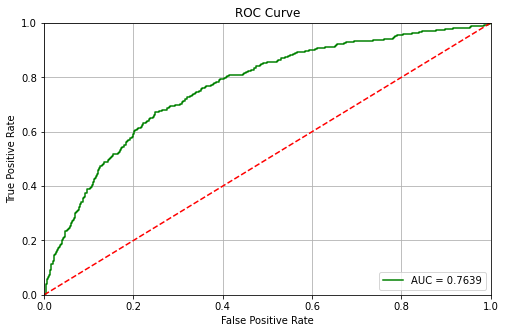

In [17]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("F1:", f1_score(y_val, y_pred))
roc_curve_plot(model, X_val, y_val)

Эффект от взвешивания классов для регрессии примерно такой же как от смещения порога 

#### Решающие деревья

Для деревьев выведем зависимость f1 от глубины одновремменно для случая сбалансированных и несбалансированных весов 

Без балансировки
Максимальная F1-мера = 0.5677, глубина  5
С балансировкой
Максимальная F1-мера = 0.5557, глубина  7


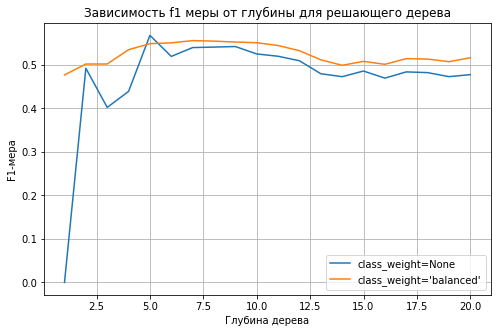

In [18]:
print('Без балансировки')
f1_test_decision_tree(X_train, y_train, X_val, y_val, max_depth=20)
print('С балансировкой')
dt_model = f1_test_decision_tree(X_train, y_train, X_val, y_val, max_depth=20, class_weight='balanced')
plt.legend(["class_weight=None","class_weight='balanced'"]);

В целом деревья с балансировкой предсказывают лучше, хотя макимальная мера и получилась для деревьев без балансировки классов, но это исключение, видно по графику

Посмотрим на AUC ROC для лучшей модели среди деревьев 

F1: 0.5556612749762131


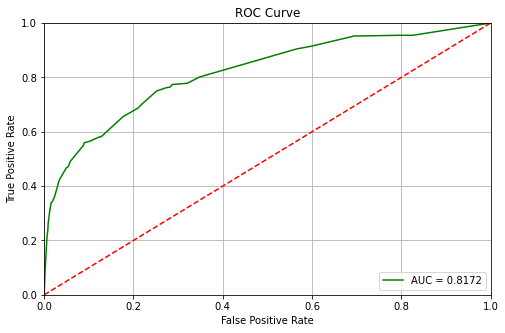

In [19]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
print("F1:", f1_score(y_val, y_pred))
roc_curve_plot(dt_model, X_val, y_val)

Для решающего дерева взвешивание классов незначительно увеличило f1 меру и AUC ROC.

#### Случайный лес

Как и делали раньше обучим лес с разными значениями глубины и и количества деревьев

Общий прогресс:   0%|          | 0/5 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators =  10, max_depth =  9 : 0.5907
Максимальная F1-мера: n_estimators =  20, max_depth =  9 : 0.5964
Максимальная F1-мера: n_estimators =  30, max_depth = 12 : 0.6092
Максимальная F1-мера: n_estimators =  40, max_depth = 12 : 0.6093
Максимальная F1-мера: n_estimators =  50, max_depth = 12 : 0.6102


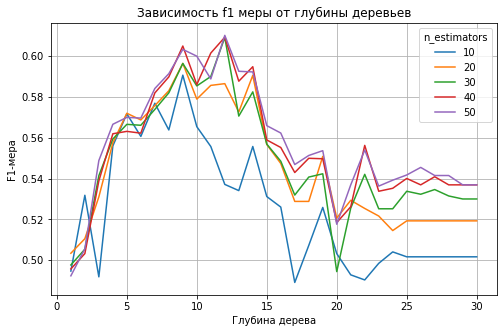

In [20]:
n_est_list = [10, 20, 30, 40, 50]
prev_score = 0
for n_est in tqdm(n_est_list, desc='Общий прогресс'):
    model, score = f1_test_random_forest_depth(
                        X_train, y_train, X_val, y_val, depths=range(1,31), 
                        n_estimators=n_est, class_weight='balanced')
    if score > prev_score: 
        rf_model1 = model
        
plt.legend(n_est_list,title='n_estimators');

При взвешивании классов лес предсказывает лучше, при этом и на ощутимо меньшей глубине. Однако на большой глубине деревья переобучаются

Общий прогресс:   0%|          | 0/5 [00:00<?, ?it/s]

max_depth = 8:   0%|          | 0/15 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators = 240, max_depth =  8 : 0.6058


max_depth = 9:   0%|          | 0/15 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators = 300, max_depth =  9 : 0.6071


max_depth = 10:   0%|          | 0/15 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators = 280, max_depth = 10 : 0.6127


max_depth = 11:   0%|          | 0/15 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators =  40, max_depth = 11 : 0.6015


max_depth = 12:   0%|          | 0/15 [00:00<?, ?it/s]

Максимальная F1-мера: n_estimators =  40, max_depth = 12 : 0.6093


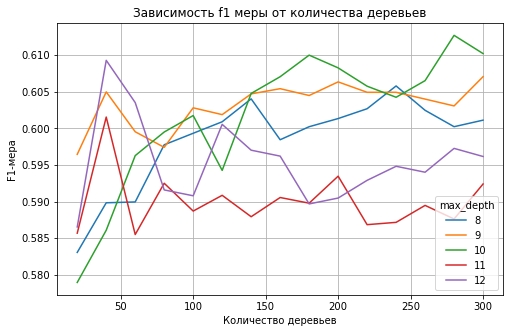

In [21]:
depth_list = [8, 9, 10, 11, 12]
prev_score = 0
for dep in tqdm(depth_list, desc='Общий прогресс'):
    model, score = f1_test_random_forest_n_estimators(
                        X_train, y_train, X_val, y_val, max_depth=dep, 
                        n_estimators=range(20,301,20), class_weight='balanced')
    if score > prev_score: 
        rf_model2 = model
    
plt.legend(depth_list, title='max_depth');

С ростом количества деревьев мера увеличивается, но также значительно увеличивается время обучения

Посмотрим на AUC ROC моделей леса с наилучшей метрикой f1

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=50,
                       random_state=123)
F1: 0.6102150537634408


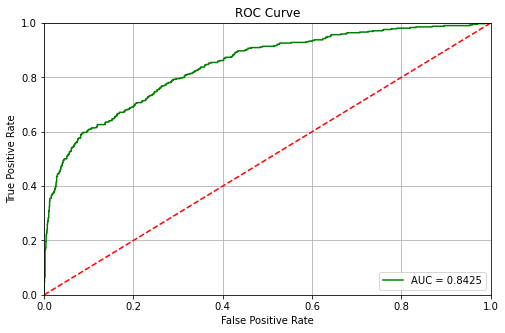

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=40,
                       random_state=123)
F1: 0.6092896174863388


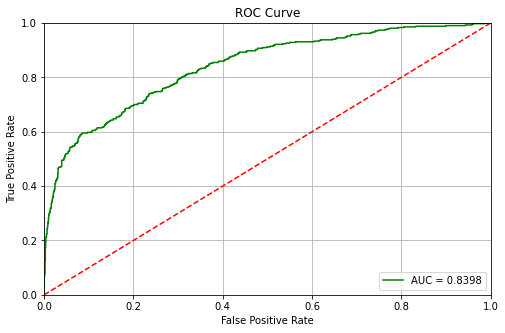

In [22]:
for model in [rf_model1, rf_model2]:
    print(model)
    model.fit(X_train, y_train)
    print("F1:", f1_score(y_val, model.predict(X_val)))
    roc_curve_plot(model, X_val, y_val)

### Upsampling и Downsampling

- В `X_upsampled` `y_upsampled` запишем выборки с увеличенным в 4 раза количеством объектов положительного класса.
- В `X_downsampled` `y_downsampled` - с уменьшенным в 4 раза количеством объектов отрицательного класса.

In [23]:
# количества объектов каждого класса
cnt = y_train.value_counts()
print('Размеры классов тренировочной выбрки до сэмплинга:')
print(cnt, '\n')

X_upsampled, y_upsampled = upsample(X_train, y_train, round(cnt[0]/cnt[1]))
X_downsampled, y_downsampled = downsample(X_train, y_train, cnt[1]/cnt[0])

# проверим получившиеся размеры выборок
print_shape(X_upsampled, y_upsampled, 'Увеличенная тренировочная выборка:\n')
print(y_upsampled.value_counts(), '\n')
print_shape(X_downsampled, y_downsampled, 'Уменьшенная тренировочная выборка:\n')
print(y_downsampled.value_counts())

Размеры классов тренировочной выбрки до сэмплинга:
0    4797
1    1203
Name: Exited, dtype: int64 

Увеличенная тренировочная выборка:
Признаки - (9609, 11), Метки - (9609,)
1    4812
0    4797
Name: Exited, dtype: int64 

Уменьшенная тренировочная выборка:
Признаки - (2406, 11), Метки - (2406,)
0    1203
1    1203
Name: Exited, dtype: int64


Upsampled F1: 0.49659863945578225


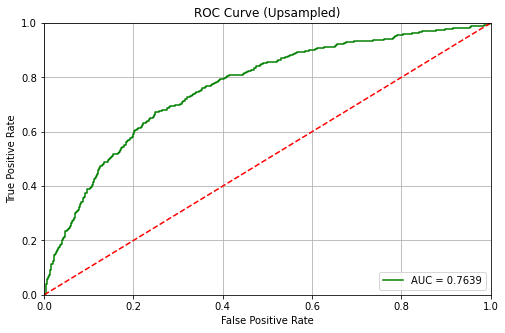

Downsampled F1: 0.5012831479897348


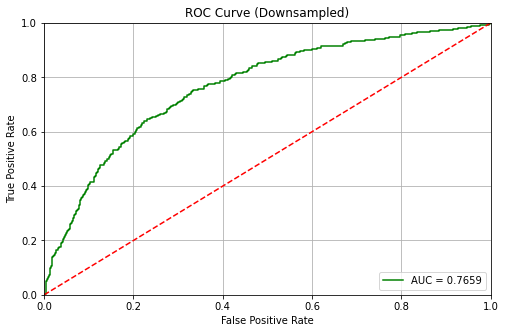

In [24]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(X_upsampled, y_upsampled)
print("Upsampled F1:", f1_score(y_val, model.predict(X_val)))
roc_curve_plot(model, X_val, y_val, title="ROC Curve (Upsampled)")

model.fit(X_downsampled, y_downsampled)
print("Downsampled F1:", f1_score(y_val, model.predict(X_val)))
roc_curve_plot(model, X_val, y_val, title="ROC Curve (Downsampled)")

Сэмплирование для регрессии даёт примерно такие же результаты, как и взвешивание классов. Посмотрим, как оно влияет на обучение решающих деревьев 

Upsampling
Максимальная F1-мера = 0.5548, глубина  7
Downsampling
Максимальная F1-мера = 0.5524, глубина  5


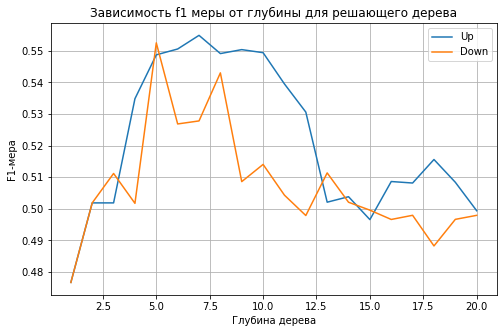

Upsampled F1: 0.5548141086749285


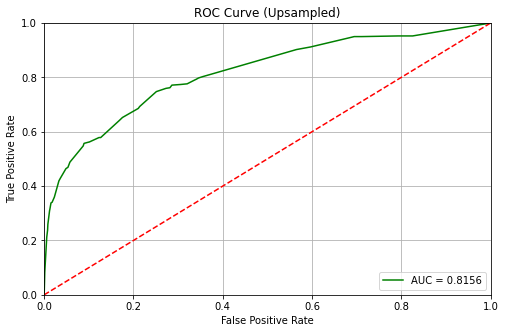

Downsampled F1: 0.5524475524475525


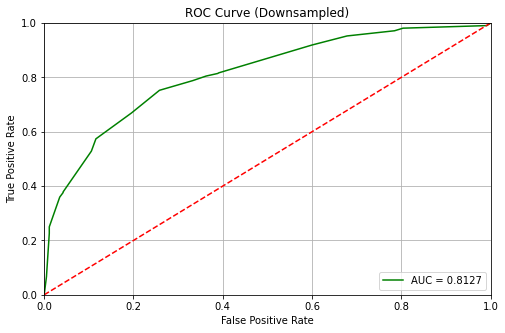

In [25]:
print('Upsampling')
dt_upsampled = f1_test_decision_tree(X_upsampled, y_upsampled, 
                                     X_val, y_val, max_depth=20)
print('Downsampling')
dt_downsampled = f1_test_decision_tree(X_downsampled, y_downsampled, 
                                       X_val, y_val, max_depth=20)
plt.legend(['Up','Down']);
plt.show()

dt_upsampled.fit(X_upsampled, y_upsampled)
print("Upsampled F1:", f1_score(y_val, dt_upsampled.predict(X_val)))
roc_curve_plot(dt_upsampled, X_val, y_val, title="ROC Curve (Upsampled)")

dt_downsampled.fit(X_downsampled, y_downsampled)
print("Downsampled F1:", f1_score(y_val, dt_downsampled.predict(X_val)))
roc_curve_plot(dt_downsampled, X_val, y_val, title="ROC Curve (Downsampled)")

В целом деревья, обученные на увеличенном наборе данных предсказывают лучше, чем на уменьшенном. Однако, эффект от сэмплинга примерно такой же, как от взвешивания классов.

## Тестирование модели

Из проверенных нами моделей наилучшие результаты дали модели случайного леса с глубиной 10-12. Проверим их на тестовой выборке

In [27]:
rf1 = RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=50, random_state=RANDOM_STATE)
rf2 = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=180, random_state=RANDOM_STATE)
rf3 = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=280, random_state=RANDOM_STATE)

for m in [rf1, rf2, rf3]:
    print(m)
    start = time.time()
    m.fit(X_train, y_train)
    fit_time = time.time() - start
    print('F1-score validate: {:.4f}'.format(f1_score(y_val, m.predict(X_val))))
    print('             test: {:.4f}'.format(f1_score(y_test, m.predict(X_test))))
    print('Accuracy validate: {:.4f}'.format(m.score(X_val, y_val)))
    print('             test: {:.4f}'.format(m.score(X_test, y_test)))
    print('         fit time: {:.4f} s \n'.format(fit_time))

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=50,
                       random_state=123)
F1-score validate: 0.6102
             test: 0.6092
Accuracy validate: 0.8550
             test: 0.8550
         fit time: 0.2410 s 

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=180,
                       random_state=123)
F1-score validate: 0.6100
             test: 0.6248
Accuracy validate: 0.8440
             test: 0.8475
         fit time: 0.7820 s 

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=280,
                       random_state=123)
F1-score validate: 0.6127
             test: 0.6247
Accuracy validate: 0.8445
             test: 0.8480
         fit time: 1.2250 s 



Для выбранных моделей f1 мера отличается не сильно. Модель с меньшим количеством деревьев может быть предпочтительнее, так как даёт высокую метрику при меньшем времени работы алгоритма. По значениям точности нет признаков переобучения моделей.  